## Знакомство с pandas

pandas — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные» (англ. panel data), используемого для описания многомерных структурированных наборов информации. 



https://khashtamov.com/ru/pandas-introduction/

https://habr.com/ru/company/ruvds/blog/442516/

https://proglib.io/p/pandas-tricks/

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

Основные возможности библиотеки:

    - Объект DataFrame для манипулирования индексированными массивами двумерных данных
    - Инструменты для обмена данными между структурами в памяти и файлами различных форматов
    - Встроенные средства совмещения данных и способы обработки отсутствующей информации
    - Переформатирование наборов данных, в том числе создание сводных таблиц
    - Срез данных по значениям индекса, расширенные возможности индексирования, выборка из больших наборов данных
    - Вставка и удаление столбцов данных
    - Возможности группировки позволяют выполнять трёхэтапные операции типа «разделение, изменение, объединение» (англ. split-apply-combine).
    - Слияние и объединение наборов данных
    - Иерархическое индексирование позволяет работать с данными высокой размерности в структурах меньшей размерности
    - Работа с временными рядами: формирование временных периодов и изменение интервалов и так далее

Библиотека оптимизирована для высокой производительности, наиболее важные части кода написаны на Cython и Си. 

In [1]:
#импортируем библиотеку pandas

import pandas as pd


In [2]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [24]:
#Создание таблицы с помощью открытия csv файла

df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/landing/master/train.csv') 
df.head(10)
# df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
#Описываем датасет с технической точки зрения: длина, типы данных и пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#Описываем датасет с семантической точки зрения: количество значений, среднее, стандартное отклонение и т.д

df.describe()
# df.describe(include=['O'])
# df.describe(include='all')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#normalize=False
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
C62 C64        1
C91            1
D47            1
D45            1
C148           1
Name: Cabin, Length: 147, dtype: int64

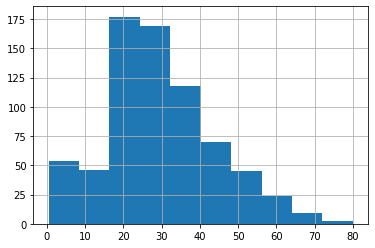

In [25]:
df['Age'].hist()

In [26]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df[cols]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [29]:
df[5:8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [36]:
df[df.columns[1]]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [39]:
df.loc[5:8, ['Survived', 'Pclass']]

,Survived,Pclass
5,0,3
6,0,1
7,0,3
8,1,3


In [41]:
df.iloc[3:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [42]:
df.iloc[3:5, 0:2]

,PassengerId,Survived
3,4,1
4,5,0


In [43]:
df[df.Age > 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df[(df.Age > 20) & (df.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [50]:
import numpy as np
rand = np.random.rand(891)

In [51]:
df['rand'] = rand
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.243563
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.482864
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.909935
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.785918
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.058133


In [53]:
df['Alone'] = df.apply(lambda x: 'not_alone' if x['SibSp']  or x['Parch'] > 0 else 'alone', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.243563,not_alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.482864,not_alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.909935,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.785918,not_alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.058133,alone


### Пропущенные значения

In [54]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
rand             0
Alone            0
dtype: int64

In [56]:
#inplace = False, если хотим заменить датафрейм то меняем на True
df.dropna(how='any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.482864,not_alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.785918,not_alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.497710,alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.046357,not_alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.126224,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.685548,not_alone
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.695735,alone
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.322352,not_alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.199567,alone


In [27]:
df.groupby('Survived').agg('mean')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Принцип действия **groupby**
![](https://i.stack.imgur.com/sgCn1.jpg)

- Разделение данных по группап по определенному критерию

- Применение к каждой группе определенной функции

- Сложение результатов в единую структуру

In [28]:
df.groupby('Pclass').agg('median')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [68]:
df.groupby(['Age', 'Fare']).sum()

PassengerId  Survived  Pclass  SibSp  Parch      rand
Age   Fare                                                          
0.42  8.5167           804         1       3      0      1  0.808992
0.67  14.5000          756         1       2      1      1  0.339169
0.75  19.2583         1115         2       6      4      2  0.346216
0.83  18.7500          832         1       2      1      1  0.245361
      29.0000           79         1       2      0      2  0.694064
...                    ...       ...     ...    ...    ...       ...
70.50 7.7500           117         0       3      0      0  0.716995
71.00 34.6542           97         0       1      0      0  0.961158
      49.5042          494         0       1      0      0  0.943554
74.00 7.7750           852         0       3      0      0  0.718026
80.00 30.0000          631         1       1      0      0  0.960430

[703 rows x 6 columns]

### Способ №1

Заменить пропущенные значения в столбце Age медианным значением возраста


In [57]:
df.fillna(df['Age'].median())['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Способ №2

Заменить пропущенные значения в столбце Age медианным значением возраста, характерного для пассажиров, которые путешествовали в том же классе, что и пассажир, чей возраст нужно найти.


In [58]:
#теперь сгруппируем по классу 
age_by_class = df.groupby("Pclass").transform(lambda x: x.fillna(x.median()))
df['Age'] = age_by_class['Age']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.243563,not_alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.482864,not_alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.909935,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.785918,not_alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.058133,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.167926,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.199567,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0.360667,not_alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.901177,alone


In [61]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.066409
SibSp            0.523008
Parch            0.381594
Fare            32.204208
rand             0.489811
dtype: float64

In [66]:
### Работа с текстовыми данными

s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge (аналог Join из SQL)


In [67]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [70]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                  'B': ['A', 'B', 'C'] * 4,
                  'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D': np.random.randn(12),
                  'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.270062,-1.585759
1,one,B,foo,2.226449,-0.368391
2,two,C,foo,0.325178,-0.041061
3,three,A,bar,-0.510099,-1.062540
4,one,B,bar,0.316353,1.573010
5,one,C,bar,-0.708805,0.481359
6,two,A,foo,-0.286162,-0.347490
7,three,B,foo,0.256220,-0.854590
8,one,C,foo,-1.004546,0.385116
9,one,A,bar,-1.319265,-0.493405


In [71]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.319265  0.270062
      B  0.316353  2.226449
      C -0.708805 -1.004546
three A -0.510099       NaN
      B       NaN  0.256220
      C  1.907461       NaN
two   A       NaN -0.286162
      B -0.085789       NaN
      C       NaN  0.325178

### Время и даты в pandas

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/reni_land/master/test.csv')
df.head()

,id,Дата рождения,Вакансия,Технология,Локация,З/п в валюте найма
0,1,18.04.1994,Инженер-программист 2 категории,JS,Санкт-Петербург,"140 000,00 ₽"
1,2,27.03.1993,Разработчик информационных систем,.NET,Москва,"130 000,00 ₽"
2,3,24.11.1983,Java Developer,Java,Санкт-Петербург,"200 000,00 ₽"
3,4,09.06.1989,Архитектор ПО,Java,Москва,"250 000,00 ₽"
4,5,03.10.1978,QA Automation Engineer,QA,Санкт-Петербург,"172 413,00 ₽"


In [78]:
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'])

df[:, 1]

TypeError: '(slice(None, None, None), 1)' is an invalid key